# Shortest Path Problem

### Imports 

In [59]:
import math
import numpy as np
from graphviz import Digraph
import queue

### Utilities to draw graphs 

In [60]:
def get_graph_img_from_adjacency_matrix(graph_matrix):
    n_nodes = len(graph_matrix)
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for i in range(n_nodes):
        for j in range(n_nodes):
            if np.isfinite(graph_matrix[i][j]):
                dot.edge(str(i), str(j), str(graph_matrix[i][j]))
    
    return dot

def get_graph_img_from_adjacency_list(graph_list):
    n_nodes = len(graph_list)
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for i in range(n_nodes):
        for adj_node, edge_cost in graph_list[i]:
            dot.edge(str(i), str(adj_node), str(edge_cost))
    
    return dot

def get_graph_img_from_edges_list(n_nodes, edges_list):
    dot = Digraph()

    for i in range(n_nodes):
        dot.node(str(i))

    for edge in edges_list:
        start, destination, cost = edge
        dot.edge(str(start), str(destination), str(cost))
    
    return dot

## Graphs

### Graph with no negative edge

In [61]:
n_nodes = 10

# List of tuples (start, destination, cost) which represent directed edges
non_negative_edges_list = [
    (0, 1, 2),
    (0, 2, 10),
    (0, 3, 7),
    (1, 5, 4),
    (2, 3, 2),
    (2, 4, 3),
    (4, 0, 5),
    (5, 3, 1),
    (7, 8, 3),
    (8, 9, 4),
    ]

# Adjacency list representation of a graph of n_nodes nodes
# non_negative_graph_list[i] contains a list of tuple (adj_node, cost) for all adjacent nodes of i
non_negative_graph_list = [[] for _ in range(n_nodes)] 

for edge in non_negative_edges_list:
    start, destination, cost = edge
    non_negative_graph_list[start].append((destination, cost))

#### Solution 

In [62]:
# List of tuples (start, destination, shortest_path_cost) which represent directed edges
non_negative_solution_list = [
    (0, 1, 2),
    (0, 5, 6),
    (0, 3, 7),
    (0, 8, np.inf),
    (4, 1, 7),
    ]

#### Draw Graph

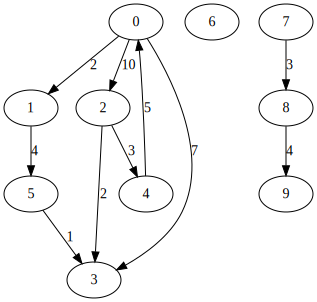

In [63]:
img = get_graph_img_from_adjacency_list(non_negative_graph_list)
img

### Graph with negative edges

In [64]:
n_nodes = 10

# List of tuples (start, destination, cost) which represent directed edges
edges_list = [
    (0, 1, 2),
    (0, 2, 10),
    (0, 3, 7),
    (1, 5, 4),
    (2, 3, -4),
    (2, 4, 3),
    (3, 6, 1),
    (4, 0, -5),
    (5, 3, 1),
    (7, 8, 3),
    (8, 9, 4),
    ]

# Adjacency list representation of a graph of n_nodes nodes
# non_negative_graph_list[i] contains a list of tuple (adj_node, cost) for all adjacent nodes of i
graph_list = [[] for _ in range(n_nodes)] 

# Adjacency matrix representation of a graph of n_nodes nodes
# Initialize all values to infinite
graph_matrix = np.full((n_nodes, n_nodes), np.inf) 
# Values in the diagonal are 0: going from any node to itself has no cost
# np.fill_diagonal(graph_matrix, 0)

for edge in edges_list:
    start, destination, cost = edge
    graph_matrix[start, destination] = cost
    graph_list[start].append((destination, cost))

#### Solution 

In [65]:
# List of tuples (start, destination, shortest_path_cost) which represent directed edges
solution_list = [
    (0, 1, 2),
    (0, 5, 6),
    (0, 3, 6),
    (0, 8, np.inf),
    (0, 6, 7),
    (4, 1, -3),
    ]

#### Draw Graph

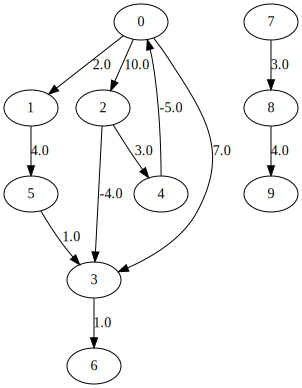

In [66]:
img = get_graph_img_from_adjacency_matrix(graph_matrix)
img

### Testing Utilities

In [96]:
def test_single_source(algorithm, graph_list, solution_list):
    n_nodes = len(graph_list)   
    for start_node in range(n_nodes):
        sp = algorithm(non_negative_graph_list, start_node)
        print(str(start_node) + ":  " + str(sp))
        for sol in solution_list:
            start, destination, cost = sol
            if start == start_node:
                if sp[destination] != cost:
                    return False
    return True

def test_single_source_non_negative(algorithm):
    return test_single_source(algorithm, non_negative_graph_list, non_negative_solution_list)

def test_single_source_negative(algorithm):
    return test_single_source(algorithm, graph_list, solution_list)

## Single-Source Shortest Paths

### Dijkstra Algorithm

In [93]:
"""
    Takes an adjacency list representing a graph and a starting node 'start',
    and returns a list 'sp' where sp[i] indicates the shortest path cost
    from start to i.
        Greedy algorithm which always chooses the closest node from the fringe.
        Once a node has been extracted from the fringe, then it's sp from the origin
    has already been computed.
    Each node gets visited (in this case, extracted from the priority queue) only once
"""
def dijkstra(graph, start):
    n_nodes = len(graph)
    
    # Array containing the shortest path costs initialized to infinity, apart to start itself which is 0
    sp = np.full(n_nodes, np.inf)
    sp[start] = 0
    
    # Bitmaps to indicate if a given node has already been visited
    visited = np.full(n_nodes, False)
    
    # Min-priority queue representing the fringe of nodes. Contains tuples (distance_from_start, node)
    fringe = queue.PriorityQueue()
    fringe.put((sp[start], start))
    
    while not fringe.empty():
        _, node = fringe.get()
        
        visited[node] = True
        
        for adj_node, edge_cost in graph[node]:
            if not visited[adj_node]:
                if sp[adj_node] > sp[node] + edge_cost:
                    sp[adj_node] = sp[node] + edge_cost
                    fringe.put((sp[adj_node], adj_node))
    
    return sp


#### Testing 

Dijkstra algorithm should produce the correct answers for our graph with non negative edges.

In [94]:
assert test_single_source_non_negative(dijkstra) == True

However, it doesn't in general produce correct answers for graphs with negative edges. Our graph with negative edges should serve as example.

In [97]:
assert test_single_source_negative(dijkstra) == False

0:  [  0.   2.  10.   7.  13.   6.  inf  inf  inf  inf]
1:  [ inf   0.  inf   5.  inf   4.  inf  inf  inf  inf]
2:  [  8.  10.   0.   2.   3.  14.  inf  inf  inf  inf]
3:  [ inf  inf  inf   0.  inf  inf  inf  inf  inf  inf]
4:  [  5.   7.  15.  12.   0.  11.  inf  inf  inf  inf]
5:  [ inf  inf  inf   1.  inf   0.  inf  inf  inf  inf]
6:  [ inf  inf  inf  inf  inf  inf   0.  inf  inf  inf]
7:  [ inf  inf  inf  inf  inf  inf  inf   0.   3.   7.]
8:  [ inf  inf  inf  inf  inf  inf  inf  inf   0.   4.]
9:  [ inf  inf  inf  inf  inf  inf  inf  inf  inf   0.]


AssertionError: 

### Dijkstra Variant For Negative Edges

In [73]:
"""
    Takes an adjacency list representing a graph and a starting node 'start',
    and returns a list 'sp' where sp[i] indicates the shortest path cost
    from start to i.
        Greedy algorithm which always chooses the closest node from the fringe.
        Once a node has been extracted from the fringe, then it's sp from the origin
    has already been computed.
"""
def dijkstra_variant(graph, start):
    n_nodes = len(graph)
    # Array containing the shortest path costs initialized to infinity, apart to start itself which is 0
    sp = np.full(n_nodes, np.inf)
    sp[start] = 0
    
    # Min-priority queue representing the fringe of nodes. Contains tuples (distance_from_start, node)
    fringe = queue.PriorityQueue()
    fringe.put((sp[start], start))
    
    while not fringe.empty():
        _, node = fringe.get()
        
        for adj_node, edge_cost in graph[node]:
            if sp[adj_node] > sp[node] + edge_cost:
                sp[adj_node] = sp[node] + edge_cost
                fringe.put((sp[adj_node], adj_node))
    
    return sp


#### Testing 

Dijkstra algorithm should produce the correct answers for our graph with non negative edges.

In [74]:
start_node = 0
sp = dijkstra_variant(non_negative_graph_list, start_node)

for sol in non_negative_solution_list:
    start, destination, cost = sol
    
    if start == start_node:
        assert sp[destination] == cost 

This variant should produce the correct answers also for graphs with negative edges. Our graph with negative edges should serve as example.

In [75]:
start_node = 0
sp = dijkstra_variant(graph_list, start_node)

for sol in solution_list:
    start, destination, cost = sol
    
    if start == start_node:
        assert sp[destination] == cost

## All Pairs Shorterst Paths

### Floyd Warshall Algorithm

In [70]:
"""
    Takes an adjacency matrix representing a graph and returns a new matrix
    with matrix[i, j] containg the shortest path between node i and node j.
"""
def floyd_warshall(graph_matrix):
    g = graph_matrix[:][:]
    n_nodes = len(g)
    floyd_warshall_helper(g, n_nodes - 1)
    
    return g

""" 
    Takes a matrix representing a graph and modifies that matrix
    so that at the end of the function graph[i, j] contains the shortest path between
    node i and node j using only nodes in the set {0,1, .., k} as intermediary nodes, 
    which we will call sp(i, j, k).
      We have sp(i, j, k) = min(sp(i, j, k - 1), sp(i, k, k - 1) + sp(k, j, k - 1)).
    This is saying that the shortest path from i to j using nodes {0, 1, .., k} is 
    the minimum between going from i to j using only nodes {0,1, .., k - 1}, and the
    sum of first going from i to k and then from j to k (both steps still with nodes {0,1, .., k - 1}).
"""
def floyd_warshall_helper(graph, k):
    if k == -1:
        # No intermediary node, leave the original adjacency matrix unchanged
        return
    
    # Run recursively
    floyd_warshall_helper(graph, k - 1)
    # Now graph[i][j] contains the shortest path using node {0, 1, .., k - 1} as intermediary
    
    n_nodes = len(graph)
    # Update distance to get from i to j, for every i and j
    for i in range(n_nodes):
        for j in range(n_nodes):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

#### Testing 

In [71]:
sp_matrix = floyd_warshall(graph_matrix)

for sp in solution_list:
    start, destination, cost = sp
    assert sp_matrix[start, destination] == cost 

#### Complexity Analysis 

Let $n$ be the number of nodes in the graph. Floyd Warshall algorithms runs in $\mathcal{O}(n^3)$.